In [1]:
import time
import datetime
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('features.csv', index_col='match_id')

In [3]:
df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16,2449,0,4,1974,3,63


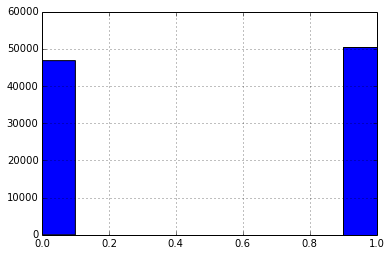

In [4]:
%matplotlib inline
df.radiant_win.hist()

In [5]:
x_df = df.drop(
    ['duration', 'radiant_win', 'tower_status_radiant',
     'tower_status_dire', 'barracks_status_radiant', 
     'barracks_status_dire'], axis=1
)

In [6]:
x_df.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [7]:
full_filled_df = x_df.dropna(axis=1)

In [8]:
print full_filled_df.shape, x_df.shape

(97230, 90) (97230, 102)


In [9]:
for item in x_df.drop(full_filled_df.columns, axis=1).columns:
    print item

first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_first_ward_time
dire_bottle_time
dire_courier_time
dire_flying_courier_time
dire_first_ward_time


In [10]:
x = x_df.fillna(0)

In [11]:
y = df.radiant_win

In [12]:
cv = KFold(y.size, n_folds=5, shuffle=True)

In [13]:
n_estimators = np.arange(10, 45, 5)

In [14]:
for n in n_estimators:
    print 'Number of estimators: ', n
    clf = GradientBoostingClassifier(n_estimators=n)
    start_time = datetime.datetime.now()
    scores = cross_val_score(clf, x.values, y, cv=cv, scoring='roc_auc')
    print 'Time elapsed: ', datetime.datetime.now() - start_time
    print 'All scores: ', scores
    print 'Mean scores: ', scores.mean()
    print '*' * 50

Number of estimators:  10
Time elapsed:  0:00:43.940846
All scores:  [ 0.67197828  0.67228042  0.65585988  0.6602592   0.66696992]
Mean scores:  0.665469540535
**************************************************
Number of estimators:  15
Time elapsed:  0:01:06.759562
All scores:  [ 0.68410709  0.67985253  0.6675193   0.67156577  0.67795909]
Mean scores:  0.676200754447
**************************************************
Number of estimators:  20
Time elapsed:  0:01:28.757749
All scores:  [ 0.689428    0.6852541   0.67478339  0.6792457   0.68442792]
Mean scores:  0.682627821888
**************************************************
Number of estimators:  25
Time elapsed:  0:01:51.371063
All scores:  [ 0.69373428  0.68858107  0.67877893  0.68405291  0.68841174]
Mean scores:  0.686711784716
**************************************************
Number of estimators:  30
Time elapsed:  0:02:13.189823
All scores:  [ 0.69817102  0.69068864  0.68268548  0.68752422  0.69104241]
Mean scores:  0.690022354

<h1>Отчет: Часть 1</h1>
<ol>
    <li><strong>Список столбцов с пропусками:</strong><br>
        first_blood_time<br>
        first_blood_team<br>
        first_blood_player1<br>
        first_blood_player2<br>
        radiant_bottle_time<br>
        radiant_courier_time<br>
        radiant_flying_courier_time<br>
        radiant_first_ward_time<br>
        dire_bottle_time<br>
        dire_courier_time<br>
        dire_flying_courier_time<br>
        dire_first_ward_time<br>
        <p>Причина пропусков в данных столбцах очень проста: некоторые события попросту могут не наступить в первые 5 минут игры. Например, пропуски в столбцах <strong>first_blood_time, first_blood_team, first_blood_player1, first_blood_player2</strong> могут быть из-за того, что игроки не вступали в бой в первые 5 минут. Столбец <strong>radiant_bottle_time (dire_bottle_time)</strong> может содержать пропуски по схожей причине - игрок мог не приобрести предмет "bottle" за первые 5 минут.</p>
    </li><br>
    <li>Имя столбца, содержащего целевую переменную:<strong> radiant_win</strong></li><br>
    <li>Кросс-валидация для градиентного бустинга с 30 деревьями была пройдена за: <strong>2 минуты 13 секунд</strong><br>
    Среднее занчение качества по метрике AUC-ROC для 30 деревьев: <strong>0.690022354698</strong></li><br>
    <li><p>Как видно из таблицы выше, при увеличении числа деревьев после 30 с шагом 5, качество все еще растет, но очень слабо, с точность в тысячных долях. Также стоит отметить, что при увелечении числа деревьев на 10 (с 30 до 40) время прохождения кросс-валидации увеличилось почти на минуту, из чего можно сделать вывод, что дальнейшее увеличение количества деревьев скорее потеря, чем выгода. Можно попытаться ускорить процесс обучения путем уменьшения глубины деревьев или понижением размерности выборки.<p></li>
</ol>
____________________________________________________________________________________________

In [13]:
c_grid = np.power(10.0, np.arange(-5, 4))

In [14]:
def log_reg_test(x, y, cv, c_grid):
    for c in c_grid:
        print 'C: ', c
        clf = LogisticRegression(C=c, penalty='l2')
        start_time = datetime.datetime.now()
        scores = cross_val_score(clf, x, y, cv=cv, scoring='roc_auc')
        print 'Time elapsed: ', datetime.datetime.now() - start_time
        print 'All scores: ', scores
        print 'Mean scores: ', scores.mean()
        print '*' * 50

In [15]:
log_reg_test(x.values, y, cv, c_grid)

C:  1e-05
Time elapsed:  0:00:01.459239
All scores:  [ 0.51239757  0.51045283  0.51764959  0.5100031   0.51692153]
Mean scores:  0.513484924229
**************************************************
C:  0.0001
Time elapsed:  0:00:01.406385
All scores:  [ 0.51239757  0.51045283  0.51764959  0.5100031   0.51692153]
Mean scores:  0.513484924229
**************************************************
C:  0.001
Time elapsed:  0:00:01.402107
All scores:  [ 0.51239757  0.51045283  0.51764959  0.5100031   0.51692153]
Mean scores:  0.513484924229
**************************************************
C:  0.01
Time elapsed:  0:00:01.410826
All scores:  [ 0.51239757  0.51045283  0.51764959  0.5100031   0.51692153]
Mean scores:  0.513484924229
**************************************************
C:  0.1
Time elapsed:  0:00:01.405925
All scores:  [ 0.51239757  0.51045283  0.51764959  0.5100031   0.51692153]
Mean scores:  0.513484924229
**************************************************
C:  1.0
Time elapsed:  0:00

In [16]:
sc_train_x = StandardScaler().fit_transform(x.values)

In [17]:
log_reg_test(sc_train_x, y, cv, c_grid)

C:  1e-05
Time elapsed:  0:00:02.326027
All scores:  [ 0.69330086  0.6952149   0.69798364  0.70097561  0.6880735 ]
Mean scores:  0.69510970273
**************************************************
C:  0.0001
Time elapsed:  0:00:03.796773
All scores:  [ 0.71215229  0.7112531   0.7137549   0.71570281  0.70294799]
Mean scores:  0.711162218742
**************************************************
C:  0.001
Time elapsed:  0:00:06.658809
All scores:  [ 0.71968567  0.71645561  0.71805504  0.71902141  0.70722177]
Mean scores:  0.716087898941
**************************************************
C:  0.01
Time elapsed:  0:00:08.787012
All scores:  [ 0.72042979  0.71666788  0.7180841   0.71883427  0.70737118]
Mean scores:  0.71627744348
**************************************************
C:  0.1
Time elapsed:  0:00:09.143296
All scores:  [ 0.72046094  0.71664045  0.71803357  0.71873999  0.70736631]
Mean scores:  0.716248252491
**************************************************
C:  1.0
Time elapsed:  0:00:0

In [18]:
categorial_cols = [
    'lobby_type', 'r1_hero', 'r2_hero', 'r3_hero',
    'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 
    'd3_hero', 'd4_hero', 'd5_hero'
]
x1 = x.drop(categorial_cols, axis=1)
x1 = StandardScaler().fit_transform(x1)

In [19]:
log_reg_test(x1, y, cv, c_grid)

C:  1e-05
Time elapsed:  0:00:02.111344
All scores:  [ 0.69323134  0.69531406  0.69790194  0.70090866  0.68799322]
Mean scores:  0.695069843086
**************************************************
C:  0.0001
Time elapsed:  0:00:03.343812
All scores:  [ 0.71211895  0.71143772  0.7137066   0.71570719  0.70295576]
Mean scores:  0.711185244306
**************************************************
C:  0.001
Time elapsed:  0:00:06.158855
All scores:  [ 0.71971931  0.71660398  0.7180077   0.71909958  0.70732323]
Mean scores:  0.716150759596
**************************************************
C:  0.01
Time elapsed:  0:00:07.978690
All scores:  [ 0.72044431  0.71679511  0.71801316  0.71890702  0.70749412]
Mean scores:  0.716330742673
**************************************************
C:  0.1
Time elapsed:  0:00:08.424646
All scores:  [ 0.72048144  0.71677931  0.7179686   0.71883144  0.70748773]
Mean scores:  0.716309703884
**************************************************
C:  1.0
Time elapsed:  0:00

In [20]:
heros = np.array([])
for i in range(1, 6, 1):
    d_key, r_key = 'd%d_hero' % i, 'r%d_hero' % i
    heros = np.hstack([heros, x[d_key], x[r_key]])

In [21]:
x.shape[0] * 10 == heros.size

True

In [22]:
print pd.unique(heros).size, pd.unique(heros).max()

108 112.0


In [23]:
n_heros = int(pd.unique(heros).max()) #pd.unique(heros).size

In [24]:
def create_heros_bag(x, n_heros):
    x_pick = np.zeros((x.shape[0], n_heros))

    for i, match_id in enumerate(x.index):
        for p in range(1, 6, 1):
            x_pick[i, x.ix[match_id, 'r%d_hero' % (p)]-1] = 1
            x_pick[i, x.ix[match_id, 'd%d_hero' % (p)]-1] = -1
    return x_pick

In [25]:
x_pick = create_heros_bag(x, n_heros)

In [26]:
pd.DataFrame(x_pick).head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0,0,0,-1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
log_reg_test(np.hstack([x_pick, x1]), y, cv, c_grid)

C:  1e-05
Time elapsed:  0:00:02.291993
All scores:  [ 0.69730716  0.6992864   0.70203528  0.70515905  0.69206717]
Mean scores:  0.69917101369
**************************************************
C:  0.0001
Time elapsed:  0:00:03.584851
All scores:  [ 0.72584884  0.72470831  0.7274262   0.72984528  0.71672154]
Mean scores:  0.724910035169
**************************************************
C:  0.001
Time elapsed:  0:00:07.464938
All scores:  [ 0.7491759   0.74499811  0.74807369  0.7496406   0.73882734]
Mean scores:  0.746143128976
**************************************************
C:  0.01
Time elapsed:  0:00:12.606902
All scores:  [ 0.75481907  0.74958838  0.75367764  0.75459626  0.74540759]
Mean scores:  0.751617785038
**************************************************
C:  0.1
Time elapsed:  0:00:17.208335
All scores:  [ 0.75515096  0.74957183  0.75401275  0.75468692  0.74581484]
Mean scores:  0.751847459047
**************************************************
C:  1.0
Time elapsed:  0:00:

In [32]:
log_reg_test(np.hstack([x_pick, x1]), y, cv, np.arange(0.1, 0.15, 0.01))

C:  0.1
Time elapsed:  0:00:16.991247
All scores:  [ 0.75515096  0.74957183  0.75401275  0.75468692  0.74581484]
Mean scores:  0.751847459047
**************************************************
C:  0.11
Time elapsed:  0:00:17.030787
All scores:  [ 0.75515498  0.74956813  0.75401325  0.75468382  0.74581737]
Mean scores:  0.751847510561
**************************************************
C:  0.12
Time elapsed:  0:00:17.142202
All scores:  [ 0.75515494  0.74956567  0.7540134   0.75468165  0.74581979]
Mean scores:  0.751847088968
**************************************************
C:  0.13
Time elapsed:  0:00:17.213987
All scores:  [ 0.75515642  0.74956325  0.75401415  0.75468155  0.7458201 ]
Mean scores:  0.751847094794
**************************************************
C:  0.14
Time elapsed:  0:00:17.165917
All scores:  [ 0.75515728  0.74955943  0.75401431  0.75467904  0.74582002]
Mean scores:  0.751846016871
**************************************************


In [33]:
best_c = 0.11

In [71]:
test_df = pd.read_csv('features_test.csv', index_col='match_id')

In [72]:
test_df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12,247,-86,272,3,4,2,0,118
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29,168,-54,NaN,3,2,2,1,16
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22,46,-87,186,1,3,3,0,-34
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49,30,-89,210,3,4,2,1,-26
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36,180,-86,180,1,3,2,1,-33


In [75]:
test_x = test_df.drop(categorial_cols, axis=1)
test_x = test_x.fillna(0)
test_x = StandardScaler().fit_transform(test_x)
test_x = np.hstack([create_heros_bag(test_df, n_heros), test_x])

In [76]:
best_log_reg = LogisticRegression(penalty='l2', C=best_c)
best_log_reg.fit(np.hstack([x_pick, x1]), y)
pred_y = best_log_reg.predict_proba(test_x)

In [86]:
print 'max: ', pred_y[:,1].max()
print 'min: ', pred_y[:,1].min()

max:  0.996464466384
min:  0.00858454803556


<h1>Отчет: Часть 2</h1>
<ol>
    <li>Качество логистической регрессии: <strong>0.71627744348</strong><br>
        Качество градиентного бустинга (30 деревьев): <strong>0.690022354698</strong><br>
        <p>Логистическая регрессия дает лучший результат за счет того, что линейные модели работают лучше на разряженных выборках с большим количеством признаков. При этом логистическая регрессия превосходит градиентный бустинг по времени на кросс-валидации более чем в 10-15 раз! Это связано с тем, что в градиентном бустинге используется композиция из нескольких десятков деревьев. К тому же, в силу того, что количество признаков велико, деревья могут быть достаточно глубокими, что будет негативно сказываться на времени.</p>
    </li><br>
    <li>Качество после удаления категориальных призанков из выборки: <strong>0.716330742673</strong>
        <p>После удаления категориальных признаков из выборки наблюдается незначительное увеличение качества. Это связано с тем, что значения категориальных признаков в данной выборке являются всего лишь идентификаторами героев игры. Математически эти велечины ничего не значат и сравнивать их по велечине нет смысла, поэтому они будут негативно влиять на качество.</p>
    </li><br>
    <li>Если взглянуть на максимальное значение, которое могут принимать категориальные признаки в данной выборке, то можно предположить, что в игре существует <strong>112</strong> различных героев. Однако, в данной выборке существует только <strong>108</strong> различных героев.<br>
    </li><br>
    <li>Качество при добавлении "мешка слов": <strong> 0.751847510561</strong>
        <p>Качество заметно улучшилось за счет того, что мы избавились от категориальных признаков, которые были перекодированы в "мешок слов".<p>
    </li>
    <li>Максимальное значение прогноза: <strong>0.996464466384</strong><br>Минимальное значение прогноза: <strong>0.00858454803556</strong>
    </li>
</ol>
____________________________________________________